### Load Packages & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dat = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-04-04/soccer21-22.csv')

dat.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


### EDA

In [3]:
## Check Columns for NAs
len(dat) - dat.count()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

<AxesSubplot:xlabel='FTR', ylabel='count'>

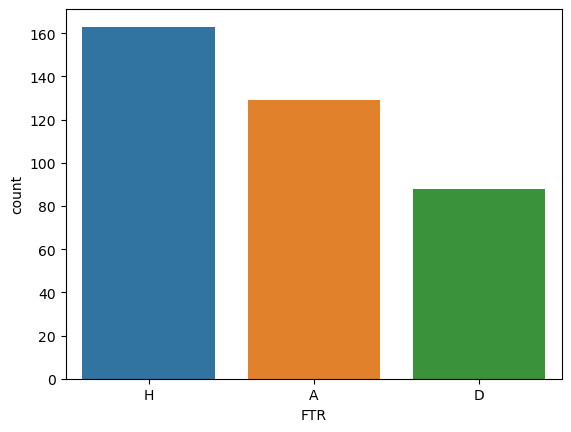

In [4]:
## Plot the count of Full Time Results (FTR)
sns.countplot(x = 'FTR', data = dat)

In [5]:
dat['FTR'].value_counts()

H    163
A    129
D     88
Name: FTR, dtype: int64

### Get Key Model Features and Create a Plot

In [6]:
dat.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [7]:
dat_model = dat[['FTR', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR']]

dat_model.head()

,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,H,1,0,8,22,3,4,12,8,2,5,0,0,0,0
1,H,1,0,16,10,8,3,11,9,5,4,1,2,0,0
2,A,1,0,14,14,3,8,10,7,7,6,2,1,0,0
3,H,2,0,13,4,6,1,15,11,5,2,0,0,0,0
4,H,0,1,14,6,6,3,13,15,6,8,2,0,0,0


In [8]:
dat_model.columns

Index(['FTR', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [9]:
dat_model_long = pd.melt(dat_model, 
        id_vars = 'FTR',
        value_vars = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'])

dat_model_long.head()

,FTR,variable,value
0,H,HTHG,1
1,H,HTHG,1
2,A,HTHG,1
3,H,HTHG,2
4,H,HTHG,0


<AxesSubplot:xlabel='FTR', ylabel='value'>

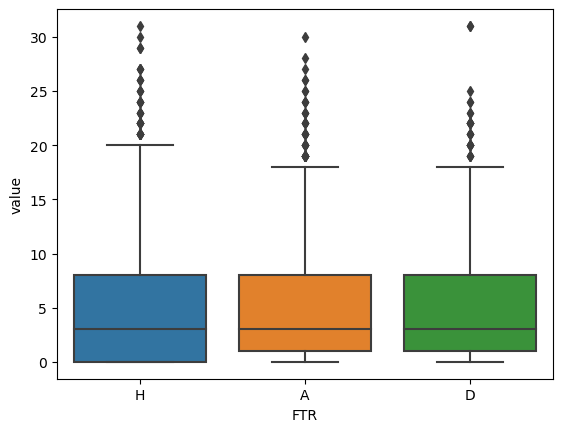

In [10]:
sns.boxplot(x = 'FTR',
           y = 'value',
           data = dat_model_long)

/Users/Patrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


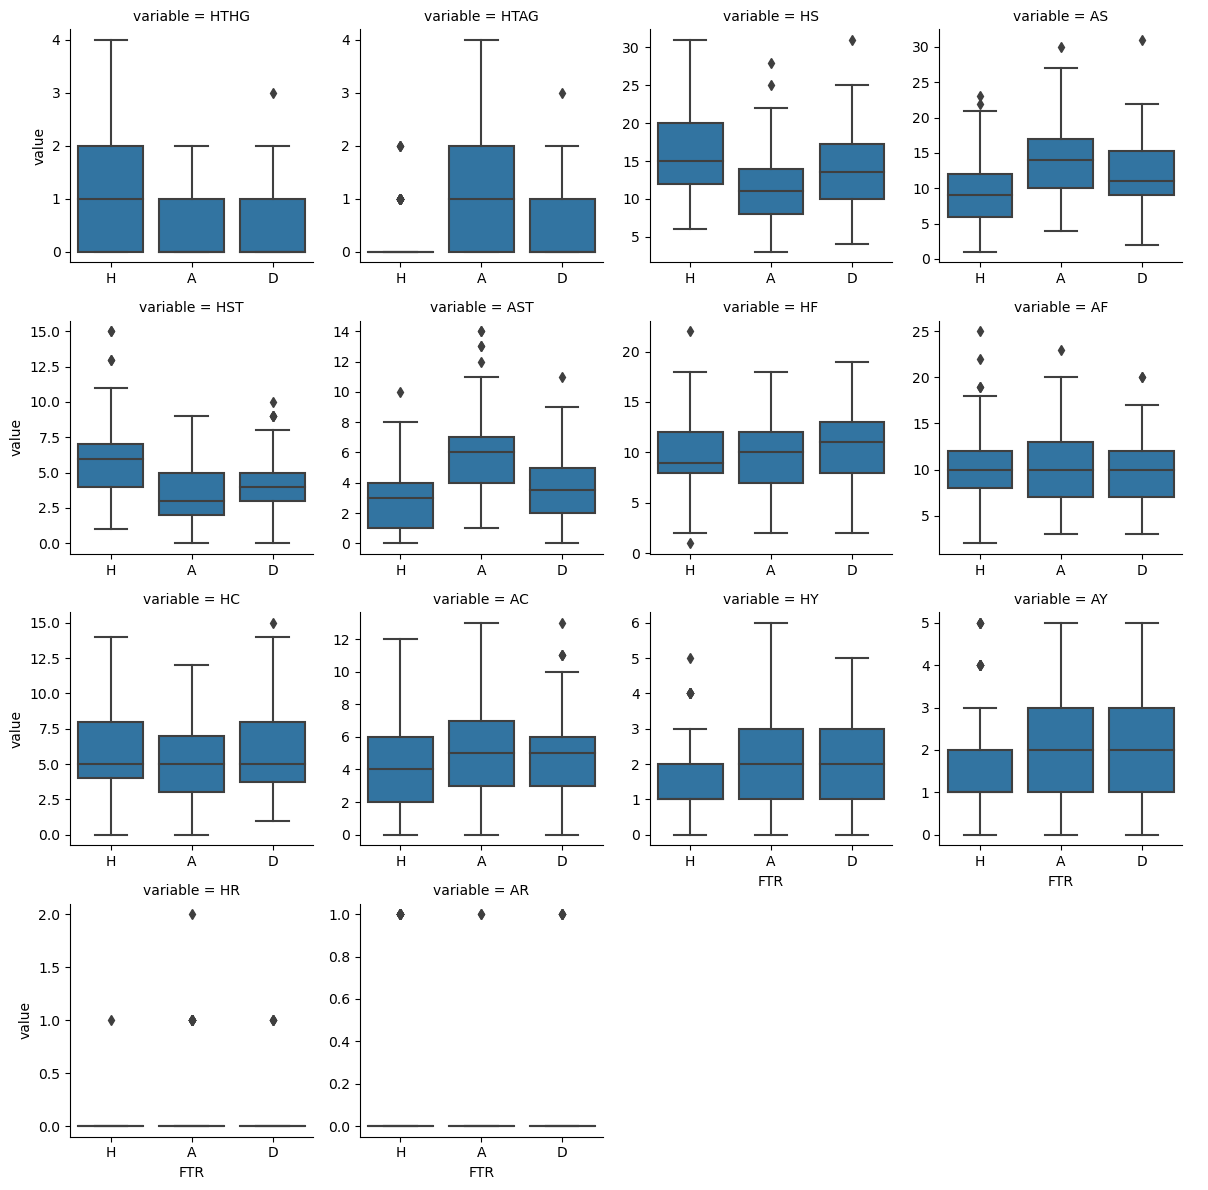

In [11]:
f = sns.FacetGrid(dat_model_long, col = "variable", col_wrap = 4, sharey = False, sharex = False)
f.map(sns.boxplot, 'FTR', 'value')
f.add_legend()

### Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features = dat_model.drop('FTR', axis=1)
outcome = dat_model['FTR']

X_train, X_test, y_train, y_test = train_test_split(
    features,
    outcome, 
    test_size=0.25,
    stratify=outcome
)

In [15]:
X_train.head()

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
93,0,1,14,8,3,3,11,11,7,1,2,3,1,0
114,1,1,8,17,4,5,8,9,5,7,3,2,0,0
42,0,1,18,13,3,3,9,8,8,3,2,1,0,0
321,2,1,14,14,7,5,9,12,1,7,3,4,0,0
110,0,2,4,16,3,7,15,8,3,5,3,1,0,0


In [16]:
y_train.value_counts() / len(y_train)

H    0.428070
A    0.340351
D    0.231579
Name: FTR, dtype: float64

In [17]:
y_test.value_counts() / len(y_test)

H    0.431579
A    0.336842
D    0.231579
Name: FTR, dtype: float64

### Set Up Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_model = RandomForestClassifier()

### Perform Hyperparameter Tuning on Cross Validation Folds

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [127]:
# Dictionary of the parameter grid to explore
forest_params = [{'max_features': list(np.linspace(start = 1, stop = 14, num = 5).astype(int)),
                 'n_estimators': list(np.linspace(start = 400, stop = 900, num = 5).astype(int))}]

In [129]:
# create cross validated structure
cv_structure = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1, random_state=30)

# Set up grid search using accuracy are the performance metric
rf_cv = GridSearchCV(estimator = rf_model,
                     param_grid = forest_params,
                     scoring = 'roc_auc_ovr',
                     n_jobs = -1,
                     cv = cv_structure,
                     verbose = 2)

### Train the model using Cross Validation

In [130]:
rf_cv.fit(X = X_train, y = y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=30),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': [1, 4, 7, 10, 14],
                          'n_estimators': [400, 525, 650, 775, 900]}],
             scoring='roc_auc_ovr', verbose=2)

### Best Parameters

In [131]:
# parameters
rf_cv.best_params_

{'max_features': 4, 'n_estimators': 400}

In [70]:
# best model
rf_cv.best_estimator_ 

RandomForestClassifier(max_features=1, n_estimators=775)

In [73]:
# Cross Validated Scoring
rf_cv.cv_results_

{'mean_fit_time': array([1.25161991, 1.71448336, 2.13897796, 2.70535765, 3.13892217,
        1.45097852, 2.02400742, 2.5015522 , 2.89790559, 3.46605802,
        1.6546896 , 2.16405721, 3.08119531, 3.30563946, 3.94696851,
        1.91601543, 2.45581765, 2.985636  , 3.65684953, 4.05980124,
        1.89962025, 2.38255219, 2.97373867, 3.73318658, 3.87067361]),
 'std_fit_time': array([0.03993041, 0.0141844 , 0.04029751, 0.10479637, 0.07931151,
        0.01714101, 0.0154652 , 0.01310822, 0.02054643, 0.09942141,
        0.06275966, 0.04414718, 0.12390857, 0.13808158, 0.08332673,
        0.01944587, 0.02892459, 0.14096759, 0.12165954, 0.03935777,
        0.03974639, 0.01132745, 0.07145619, 0.08734514, 0.47388696]),
 'mean_score_time': array([0.13232775, 0.1411108 , 0.16477385, 0.20625486, 0.25069356,
        0.11182108, 0.14545736, 0.19099317, 0.21403461, 0.27362361,
        0.12377653, 0.16617613, 0.22275677, 0.2271955 , 0.28757982,
        0.13782883, 0.17333536, 0.21917329, 0.23702455, 0.27

In [134]:
# store the best parameters
mtry = rf_cv.best_params_['n_estimators']
n_features = rf_cv.best_params_['max_features']

In [135]:
mtry, n_features

(400, 4)

### Refit the model using the optimal hyperparameters

In [136]:
rfc_optimized = RandomForestClassifier(n_estimators = mtry, max_features = n_features)
rfc_optimized.fit(X = X_train, y = y_train)

RandomForestClassifier(max_features=4, n_estimators=400)

In [137]:
rfc_optimized

RandomForestClassifier(max_features=4, n_estimators=400)

### Variable of Importance Plot

In [138]:
import matplotlib.pyplot as plt

In [139]:
importances = rfc_optimized.feature_importances_
importances

array([0.07867774, 0.10662659, 0.08670048, 0.10026291, 0.12209415,
       0.11339758, 0.0710604 , 0.06418203, 0.06915088, 0.06582701,
       0.0437844 , 0.05641629, 0.01464856, 0.007171  ])

In [140]:
## sort the importances in descending order
indices = np.argsort(importances)[::-1]
indices

array([ 4,  5,  1,  3,  2,  0,  6,  8,  9,  7, 11, 10, 12, 13])

In [141]:
## Rearrange feature names so that they match the sorted feature importances
names = [X_test.columns[i] for i in indices]
names

['HST',
 'AST',
 'HTAG',
 'AS',
 'HS',
 'HTHG',
 'HF',
 'HC',
 'AC',
 'AF',
 'AY',
 'HY',
 'HR',
 'AR']

([<matplotlib.axis.XTick at 0x7f9a5af9b610>,
 [Text(0, 0, 'HST'),
  Text(1, 0, 'AST'),
  Text(2, 0, 'HTAG'),
  Text(3, 0, 'AS'),
  Text(4, 0, 'HS'),
  Text(5, 0, 'HTHG'),
  Text(6, 0, 'HF'),
  Text(7, 0, 'HC'),
  Text(8, 0, 'AC'),
  Text(9, 0, 'AF'),
  Text(10, 0, 'AY'),
  Text(11, 0, 'HY'),
  Text(12, 0, 'HR'),
  Text(13, 0, 'AR')])

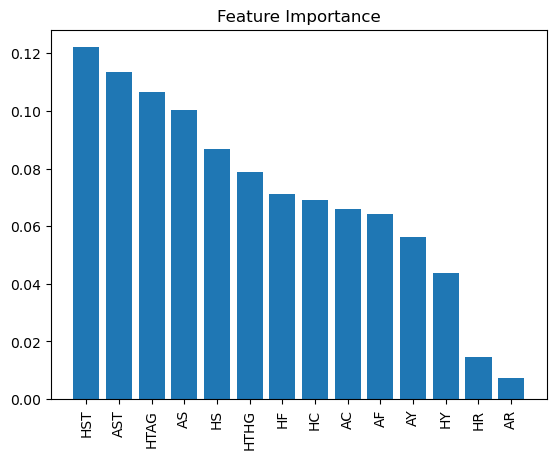

In [148]:
# plot title
plt.title("Feature Importance")

# barplot
plt.bar(range(X_test.shape[1]), importances[indices])

# feature names for x-axis
plt.xticks(range(X_test.shape[1]), names, rotation = 90)

### Get Predictions on Test Set

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
rfc_test_pred = rfc_optimized.predict(X_test)

In [152]:
confusion_matrix(y_test, rfc_test_pred)

array([[26,  5,  1],
       [13,  3,  6],
       [ 5,  3, 33]])

In [153]:
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           A       0.59      0.81      0.68        32
           D       0.27      0.14      0.18        22
           H       0.82      0.80      0.81        41

    accuracy                           0.65        95
   macro avg       0.56      0.58      0.56        95
weighted avg       0.62      0.65      0.62        95



### Save the model

In [155]:
from pickle import dump

In [156]:
dump(rfc_optimized, open('rfc_optimized.pkl', 'wb'))

### Load the model

In [97]:
from pickle import load

In [98]:
model = load(open('rfc_optimized.pkl', 'rb'))

In [157]:
model

RandomForestClassifier(max_features=1, n_estimators=775)

In [100]:
# get a new observations
new_dat = dat_model.loc[[180, 242]]
new_dat

,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
180,D,1,0,11,18,5,6,14,7,10,8,4,1,0,0
242,A,0,2,16,15,6,9,13,19,3,3,6,3,0,0


In [102]:
## Get the features by themselves to make predictions
new_feats = new_dat.drop('FTR', axis = 1)
new_feats

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
180,1,0,11,18,5,6,14,7,10,8,4,1,0,0
242,0,2,16,15,6,9,13,19,3,3,6,3,0,0


In [103]:
## Add predictions to the new data
new_dat['pred_ftr'] = model.predict(new_feats)
new_dat

,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,pred_ftr
180,D,1,0,11,18,5,6,14,7,10,8,4,1,0,0,D
242,A,0,2,16,15,6,9,13,19,3,3,6,3,0,0,A
